# Wine Data Set
This data is the result of a chemical analysis of wines grown in the same region in Italy but derived from 3 different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

###### Attribute Information
1. Type <-- (Label which has 3 classes)
2. Alcohol
3. Malic acid
4. Ash
5. Alcalinity of ash  
6. Magnesium
7. Total phenols
8. Flavanoids
9. Nonflavanoid phenols
10. Proanthocyanins
11. Color intensity
12. Hue
13. OD280/OD315 of diluted wines
14. Proline 

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('wine.data.csv')
df.columns = ['Type', 'Alcohol','Malic Acid','Ash','Alcalinity of Ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue', 'OD280/OD315', 'Proline']

In [3]:
print('df type: ' + str(type(df)))
print('df size: ' + str(df.shape))
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df size: (177, 14)


,Type,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


###### Oberving the Data Set
1. Checks for null values.
2. Sees how many classes/categories there are.
3. Counts the data points that belong to each category.

In [4]:
print('Number of NULL values in df: ' + str(df.isnull().sum().sum())) 

uniqueClasses = df['Type'].unique()
print('Number of unique classes in df: ' + str(uniqueClasses.shape))
uniqueClasses = np.sort(uniqueClasses)

for i in uniqueClasses:
    print('Class ' + str(i) + ' count: ' + str((df['Type']==i).sum()))

Number of NULL values in df: 0
Number of unique classes in df: (3,)
Class 1 count: 58
Class 2 count: 71
Class 3 count: 48


###### Shuffle Data Randomly
1. Saves the first random shuffle of the original df.
2. Saves the second random shuffle of the original df.
3. Saves the third random shuffle of the original df.

In [5]:
df_shuffle1 = df.sample(frac=1)
#df_shuffle1.head()

In [6]:
df_shuffle2 = df.sample(frac=1)
#df_shuffle2.head()

In [7]:
df_shuffle3 = df.sample(frac=1)
#df_shuffle3.head()

###### F(X) = Y
Separates data into X and Y (labels) to set up the rest of the supervised learning algos in the [ F(X) = Y ] format.
1. Sets up F(X1) = Y1 from the first random shuffle of the original df.
2. Sets up F(X2) = Y2 from the second random shuffle of the original df.
3. Sets up F(X3) = Y3 from the third random shuffle of the orignal df.

In [8]:
df_array1 = np.array(df_shuffle1)       #Convert dataframe to array in order to slice into X and Y.

X1 = df_array1[:,1:df_array1.shape[1]]  #Second Column to last column. Features are all numerical.
Y1 = df_array1[:, 0]                    #First Column. This feature represents the classes or type of wine.

In [9]:
df_array2 = np.array(df_shuffle2)      #Convert dataframe to array in order to slice into X and Y.

X2 = df_array2[:,1:df_array2.shape[1]]  #Second Column to last column. Features are all numerical.
Y2 = df_array2[:, 0]                    #First Column. This feature represents the classes or type of wine.

In [10]:
df_array3 = np.array(df_shuffle3)      #Convert dataframe to array in order to slice into X and Y.

X3 = df_array3[:,1:df_array3.shape[1]]  #Second Column to last column. Features are all numerical.
Y3 = df_array3[:, 0]                    #First Column. This feature represents the classes or type of wine.
#print('X3 shape: ' + str(X3.shape))
#print('Y3 shape: ' + str(Y3.shape))
#print(X3[:, 0])
#print(Y3)

###### Functions Used For All Classifiers
1. partitionData
2. viewSplit
3. draw_heatmap_linear
4. bestValue **<font color=green>(EXTRA CREDIT)</font>**
5. ViewConfusionMatrix
6. displayAccuracies

In [11]:
#X: Features of df.
#Y: Labels of df.
#percent: The percentage given to the training_validation set.
def partitionData(X, Y, percent):
    X_train_val = X[:int(percent*len(X))] # Get features from train + val set.
    Y_train_val = Y[:int(percent*len(Y))] # Get labels from train + val set.
    X_test      = X[int(percent*len(X)):] # Get features from test set.     
    Y_test      = Y[int(percent*len(Y)):] # Get labels from test set.
    
    return X_train_val, Y_train_val, X_test, Y_test

In [12]:
#PURPOSE: Used to see the dimensions of the data after being partioned.
#Prints the shape of X_train_val.
#Prints the shape of Y_train_val.
#Prints the shape of X_test.
#Prints the shape of Y_test.
#Prints num of UNIQUE classes in Y_train_val.
#Prints the num of data points that belong to each class/category.
#Prints num of UNIQUE classes in Y_test.
def viewSplit(X_train_val, Y_train_val, X_test, Y_test):
    print('X_train_val shape: ' + str(X_train_val.shape))
    print('Y_train_val shape: ' + str(Y_train_val.shape))
    print('X_test: ' + str(X_test.shape))
    print('Y_test: ' + str(Y_test.shape))

    uniqueClasses = df['Type'].unique()
    print('Number of unique classes in df: ' + str(uniqueClasses.shape))
    uniqueClasses = np.sort(uniqueClasses)
    
    uniqueClasses_Y_train_val = np.unique(Y_train_val)
    print('Number of unique classes in Y_train_val: ' + str(uniqueClasses_Y_train_val.shape))
    for i in uniqueClasses:
        print('Class ' + str(i) + ' count: ' + str((Y_train_val[:]==i).sum()))
    uniqueClasses_Y_test = np.unique(Y_test)
    print('Number of unique classes in Y_test: ' + str(uniqueClasses_Y_test.shape))

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#PURPOSE: Draw heatmaps for result of grid search and find best C for validation set.
def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [14]:
#PURPOSE: Searches for the highest value in accuracyValidation, then uses the index of the highest value
#         to find what value in the list caused this.
def bestValue(accuracyValidation, valueList):
    max_value_of_accV = np.max(accuracyValidation)
    max_index_of_accV = np.argmax(accuracyValidation)
    print('Largest value in accuracyValidation is ' + str(max_value_of_accV) + ' from index ' + str(max_index_of_accV) + '.')
    return valueList[max_index_of_accV]

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def ViewConfusionMatrix(Y_test, pred):
    print('Original labels:\n' + str(Y_test))
    print('Original Labels or Y_test shape: ' + str(Y_test.shape))
    print('Predicted labels:\n' + str(pred))

    #Note that the shape of the confusion matrix is not based on the shape of the Y_test or pred, but instead on 
    #how many unique classes were inside of these.
    print('\nTest Accuracy Score: ' + str(accuracy_score(Y_test, pred)))
    print(classification_report(Y_test, pred))
    confusionMatrix = confusion_matrix(Y_test, pred)
    print('Confusion Matrix shape: ' + str(confusionMatrix.shape))
    print(confusionMatrix) #Remove because it takes up to much space.....

In [16]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

def displayAccuracies(stringClfName, stringDataName, acc80_20, acc50_50, acc20_80):
 
    objects = ('80%train,20%test', '50%train,50%test', '20%train,80%test')
    y_pos = np.arange(len(objects))
    performance = [acc80_20,acc50_50,acc20_80]
 
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Accuracy')
    #plt.title('Random Forest\'s Test Accuracies for 3 Partitions')
    plt.title(str(stringClfName) +'\'s Test Accuracies of 3 Partitions on ' + str(stringDataName))
    plt.grid() #new
    plt.show()

In [17]:
#PURPOSE to print out the accuracies of 3 trials for each of the 3 partitions. 
def printAccuracies(stringClgName, list_80_20, list_50_50, list20_80):
    
    print('Accuracy of ' + str(stringClgName) +'\'s 3 trials on (80% train, 20% test) partition :' + str(list_80_20)) 
    accuracyAverage_80_20 = np.mean(list_80_20)
    print('Mean Accuracy of ' + str(stringClgName) +' on (80% train, 20% test) partition: ' + str(accuracyAverage_80_20))

    print('\nAccuracy of ' + str(stringClgName) + '\'s 3 trials on (50% train, 50% test) partition :' + str(list_50_50))
    accuracyAverage_50_50 = np.mean(list_50_50)
    print('Mean Accuracy of ' + str(stringClgName) + ' on (50% train, 50% test) partition: ' + str(accuracyAverage_50_50))

    print('\nAccuracy of ' + str(stringClgName) + '\'s 3 trials on (20% train, 80% test) partition:' + str(list20_80))
    accuracyAverage_20_80 = np.mean(list20_80)
    print('Mean Accuracy of ' + str(stringClgName) + ' on (20% train, 80% test) partition: ' + str(accuracyAverage_20_80))

###### Global Variables
CV: The number of folds that happens in the cross validation produced by GridSearchCV.

In [18]:
#Recommend running final test with CV=10, but during staging use CV=3.
CV = 10

# Support Vector Machine (SVM)
Its a supervised machine learning algorithm which can be used for both classification or regression problems. But it is usually used for classification. Given 2 or more labeled classes of data, it acts as a discriminative classifier, formally defined by an optimal hyperplane that separates all the classes.

In [19]:
#GLOBAL VARIABLES FOR SVM
C_list = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100]
SVM_accuracyTestList_80_20 = []
SVM_accuracyTestList_50_50 = []
SVM_accuracyTestList_20_80 = []

In [20]:
from sklearn import svm

#C_list: C hyperparameter.
#cv: Number of folds when doing cross validation.
def svmTrainValidation(X_train_val, Y_train_val, C_list, CV):
    
    svm_classifier = svm.SVC(kernel = 'linear')
    
    parameters = {'C':C_list}
    
    SVM_clfGridSearch = GridSearchCV(svm_classifier, param_grid=parameters, cv=CV, return_train_score=True)
    SVM_clfGridSearch.fit(X_train_val, Y_train_val) 
    
    #accuracyTrain = clfGridSearch.cv_results_['mean_train_score']      
    #accuracyValidation = clfGridSearch.cv_results_['mean_test_score']
    return SVM_clfGridSearch

### SVM on (80% train, 20% test)
Splits the 3 shuffled datasets into 2 parts:
1. (80% of all the data points) ---> Training set + Validation Set.
2. (20% of all the data points) ---> Test set.

In [21]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.8)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.8)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.8)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.69344711  0.70759573  0.8423492   0.94561871  0.97872737  0.99290704
  1.          1.        ]
[ 0.68794326  0.69503546  0.81560284  0.92198582  0.96453901  0.95035461
  0.93617021  0.93617021]


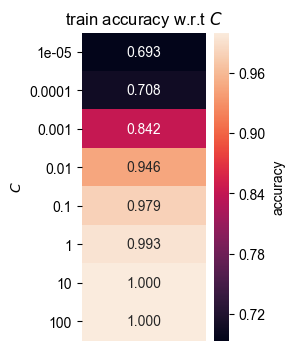

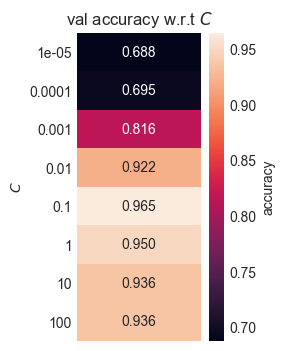

In [22]:
SVM_clfGridSearch = svmTrainValidation(X1_train_val, Y1_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [23]:
#EXTRA CREDIT
#Instead of creating my own implementation to pick out the best hyper. 
#I could have used this to find the best hyperparameter.
print(SVM_clfGridSearch.best_params_)

#Use the best C to calculate the test accuracy.
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)
# correct = [(a==b) for (a,b) in zip(pred,Y1_test)]
# test_acc = sum(correct) * 1.0 / len(correct)
# print('Test Accuracy Score: ' + str(test_acc))

#accuracy(ORIGINAL_VALUES, PREDICTED_VALUES)
accuracyTest = accuracy_score(Y1_test, pred)
SVM_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

{'C': 0.1}
Largest value in accuracyValidation is 0.964539007092 from index 4.
Best C: 0.1
Test Accuracy Score: 0.972222222222


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.70609064  0.73680712  0.82898163  0.95113501  0.98029524  1.          1.
  1.        ]
[ 0.67375887  0.71631206  0.80141844  0.91489362  0.95744681  0.96453901
  0.96453901  0.96453901]


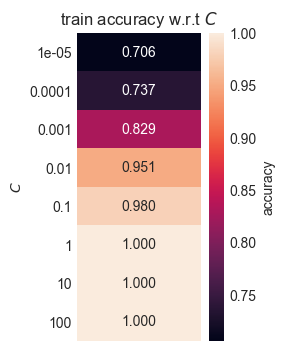

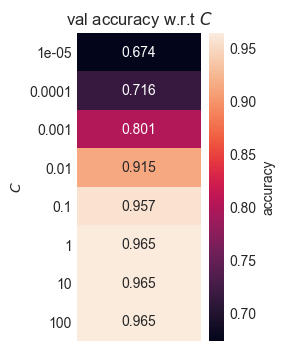

In [24]:
SVM_clfGridSearch = svmTrainValidation(X2_train_val, Y2_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [25]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
SVM_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.964539007092 from index 5.
Best C: 1
Test Accuracy Score: 0.916666666667


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.71001839  0.70376264  0.85652785  0.95744027  0.98580734  1.          1.
  1.        ]
[ 0.70212766  0.70921986  0.82978723  0.92907801  0.97163121  0.96453901
  0.96453901  0.96453901]


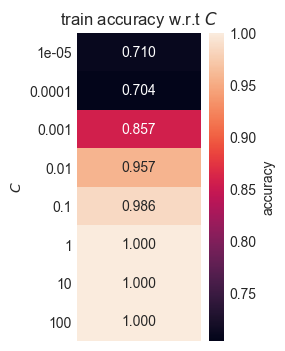

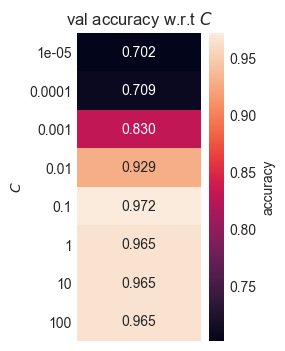

In [26]:
SVM_clfGridSearch = svmTrainValidation(X3_train_val, Y3_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [27]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
SVM_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.971631205674 from index 4.
Best C: 0.1
Test Accuracy Score: 0.944444444444


###### Mean of SVM's Test Accuracies on (80% train, 20% test)

In [28]:
import statistics 

print('SVM_accuracyTestList:' + str(SVM_accuracyTestList_80_20))
SVM_accuracyAverage_80_20 = statistics.mean(SVM_accuracyTestList_80_20)
print('SVM_accuracyTestList mean: ' + str(SVM_accuracyAverage_80_20))

SVM_accuracyTestList:[0.97222222222222221, 0.91666666666666663, 0.94444444444444442]
SVM_accuracyTestList mean: 0.944444444444


### SVM on (50% train, 50% test)
Splits the 3 shuffled datasets into 2 parts:
1. (50% of all the data points) ---> Training set + Validation Set.
2. (50% of all the data points) ---> Test set.

In [29]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.5)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.5)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.5)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.74102293  0.74618486  0.82705655  0.92805606  0.97850773  1.          1.
  1.        ]
[ 0.73863636  0.70454545  0.77272727  0.86363636  0.93181818  0.93181818
  0.92045455  0.92045455]


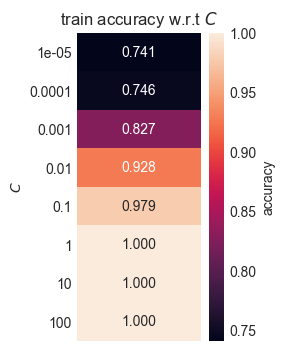

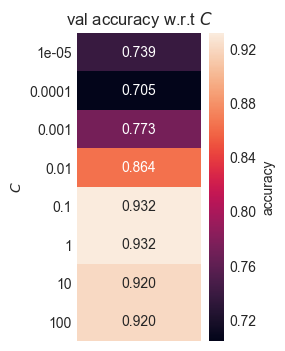

In [30]:
SVM_clfGridSearch = svmTrainValidation(X1_train_val, Y1_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [31]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
SVM_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.931818181818 from index 4.
Best C: 0.1
Test Accuracy Score: 0.966292134831


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.67040283  0.70311647  0.78749985  0.92930446  0.9861048   1.          1.
  1.        ]
[ 0.67045455  0.67045455  0.75        0.89772727  0.95454545  0.95454545
  0.95454545  0.95454545]


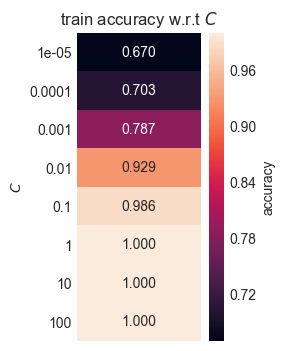

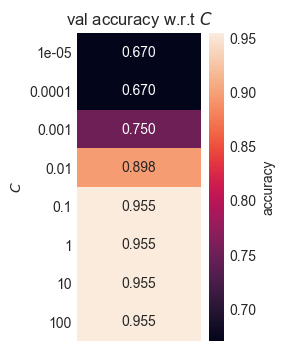

In [32]:
SVM_clfGridSearch = svmTrainValidation(X2_train_val, Y2_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [33]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
SVM_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.954545454545 from index 4.
Best C: 0.1
Test Accuracy Score: 0.955056179775


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.68689459  0.70574549  0.8042735   0.93048433  0.99116809  1.          1.
  1.        ]
[ 0.70454545  0.72727273  0.73863636  0.89772727  0.94318182  0.94318182
  0.94318182  0.94318182]


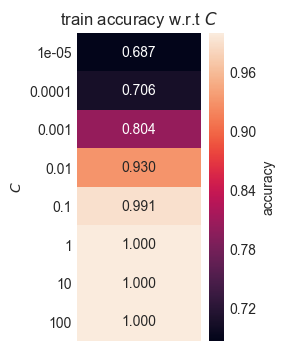

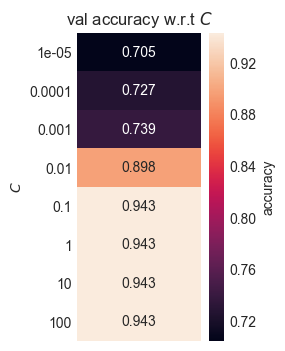

In [34]:
SVM_clfGridSearch = svmTrainValidation(X3_train_val, Y3_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [35]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
SVM_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.943181818182 from index 4.
Best C: 0.1
Test Accuracy Score: 0.932584269663


###### Mean of SVM's Test Accuracies on (50% train, 50% test)

In [36]:
print('SVM_accuracyTestList:' + str(SVM_accuracyTestList_50_50))
SVM_accuracyAverage_50_50 = statistics.mean(SVM_accuracyTestList_50_50)
print('SVM_accuracyTestList mean: ' + str(SVM_accuracyAverage_50_50))

SVM_accuracyTestList:[0.9662921348314607, 0.9550561797752809, 0.93258426966292129]
SVM_accuracyTestList mean: 0.951310861423


### SVM on (20% train, 80% test)
Splits the 3 shuffled datasets into 2 parts:
1. (20% of all the data points) ---> Training set + Validation Set.
2. (80% of all the data points) ---> Test set.

In [37]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.2)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.2)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.5)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

/Users/rod/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


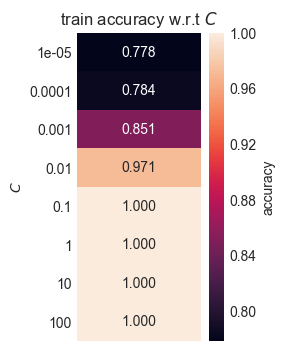

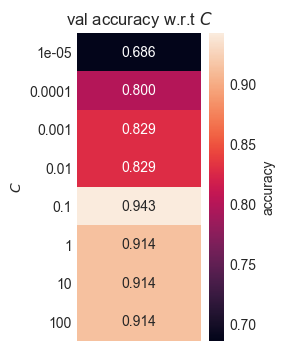

In [38]:
SVM_clfGridSearch = svmTrainValidation(X1_train_val, Y1_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [39]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
SVM_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.942857142857 from index 4.
Best C: 0.1
Test Accuracy Score: 0.880281690141


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

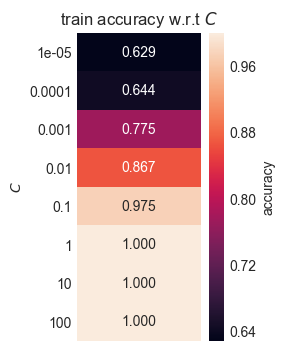

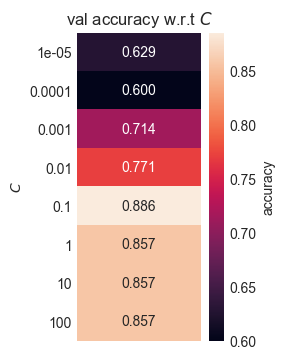

In [40]:
SVM_clfGridSearch = svmTrainValidation(X2_train_val, Y2_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [41]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
SVM_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.885714285714 from index 4.
Best C: 0.1
Test Accuracy Score: 0.957746478873


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.68689459  0.70574549  0.8042735   0.93048433  0.99116809  1.          1.
  1.        ]
[ 0.70454545  0.72727273  0.73863636  0.89772727  0.94318182  0.94318182
  0.94318182  0.94318182]


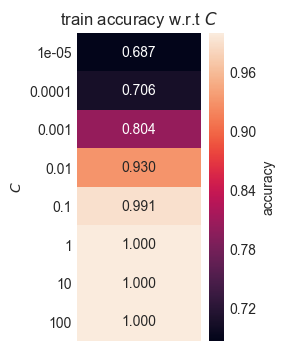

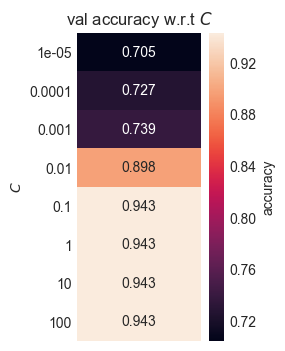

In [42]:
SVM_clfGridSearch = svmTrainValidation(X3_train_val, Y3_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [43]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
SVM_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.943181818182 from index 4.
Best C: 0.1
Test Accuracy Score: 0.932584269663


###### Mean of SVM's Test Accuracies on (20% train, 80% test)

In [44]:
print('SVM_accuracyTestList:' + str(SVM_accuracyTestList_20_80))
SVM_accuracyAverage_20_80 = statistics.mean(SVM_accuracyTestList_20_80)
print('SVM_accuracyTestList mean: ' + str(SVM_accuracyAverage_20_80))

SVM_accuracyTestList:[0.88028169014084512, 0.95774647887323938, 0.93258426966292129]
SVM_accuracyTestList mean: 0.923537479559


### **<font color=green>Results of SVM</font>**

In [45]:
print('SVM_accuracyTestList (80% train, 20% test) partition mean: ' + str(SVM_accuracyAverage_80_20))
print('SVM_accuracyTestList (50% train, 50% test) partition mean: ' + str(SVM_accuracyAverage_50_50))
print('SVM_accuracyTestList (20% train, 80% test) partition mean: ' + str(SVM_accuracyAverage_20_80))

SVM_accuracyTestList (80% train, 20% test) partition mean: 0.944444444444
SVM_accuracyTestList (50% train, 50% test) partition mean: 0.951310861423
SVM_accuracyTestList (20% train, 80% test) partition mean: 0.923537479559


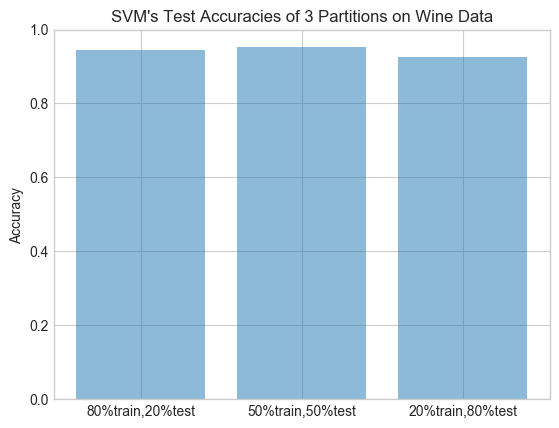

Accuracy of SVM's 3 trials on (80% train, 20% test) partition :[0.97222222222222221, 0.91666666666666663, 0.94444444444444442]
Mean Accuracy of SVM on (80% train, 20% test) partition: 0.944444444444

Accuracy of SVM's 3 trials on (50% train, 50% test) partition :[0.9662921348314607, 0.9550561797752809, 0.93258426966292129]
Mean Accuracy of SVM on (50% train, 50% test) partition: 0.951310861423

Accuracy of SVM's 3 trials on (20% train, 80% test) partition:[0.88028169014084512, 0.95774647887323938, 0.93258426966292129]
Mean Accuracy of SVM on (20% train, 80% test) partition: 0.923537479559


In [46]:
displayAccuracies('SVM', 'Wine Data',  SVM_accuracyAverage_80_20, SVM_accuracyAverage_50_50, SVM_accuracyAverage_20_80)

printAccuracies('SVM', SVM_accuracyTestList_80_20, SVM_accuracyTestList_50_50, SVM_accuracyTestList_20_80)
# print('Accuracy of SVM\'s 3 trials on (80% train, 20% test) partition :' + str(SVM_accuracyTestList_80_20))
# SVM_accuracyAverage_80_20 = statistics.mean(SVM_accuracyTestList_80_20)
# print('Mean Accuracy of SVM on (80% train, 20% test) partition: ' + str(SVM_accuracyAverage_80_20))

# print('\nAccuracy of SVM\'s 3 trials on (50% train, 50% test) partition :' + str(SVM_accuracyTestList_50_50))
# SVM_accuracyAverage_50_50 = statistics.mean(SVM_accuracyTestList_50_50)
# print('Mean Accuracy of SVM on (50% train, 50% test) partition: ' + str(SVM_accuracyAverage_50_50))

# print('\nAccuracy of SVM\'s 3 trials on (20% train, 80% test) partition:' + str(SVM_accuracyTestList_20_80))
# SVM_accuracyAverage_20_80 = statistics.mean(SVM_accuracyTestList_20_80)
# print('Mean Accuracy of SVM on (20% train, 80% test) partition: ' + str(SVM_accuracyAverage_20_80))

# Decision Tree 
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [47]:
#GLOBAL VARIABLES FOR Decision Tree
#D_list = np.asarray([1,2,3,4,5])
D_list = [1,2,3,4,5]
DT_accuracyTestList_80_20 = []
DT_accuracyTestList_50_50 = []
DT_accuracyTestList_20_80 = []

In [48]:
from sklearn import tree

def decisionTreeTrainValidation(X_train_val, Y_train_val, D_list, CV):
    
    DT_classifier = tree.DecisionTreeClassifier(criterion='entropy')

    parameters = {'max_depth': D_list}

    DT_clfGridSearch = GridSearchCV(DT_classifier, param_grid=parameters, cv=CV, return_train_score=True)
    DT_clfGridSearch.fit(X_train_val, Y_train_val)

    return DT_clfGridSearch

### Decision Tree on (80% train, 20% test)
Splits the 3 shuffled datasets into 2 parts:
1. (80% of all the data points) ---> Training set + Validation Set.
2. (20% of all the data points) ---> Test set.

In [49]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.8)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.8)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.8)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.66666872  0.95035552  0.99841895  1.          1.        ]
[ 0.65957447  0.87234043  0.94326241  0.93617021  0.93617021]


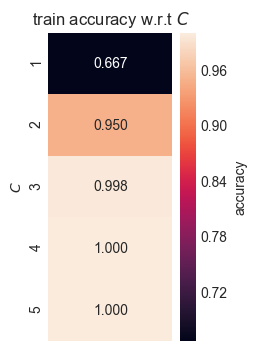

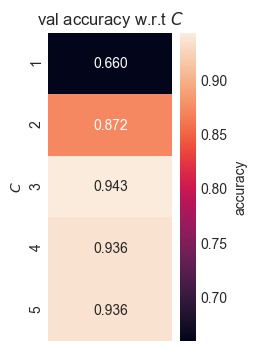

In [50]:
DT_clfGridSearch = decisionTreeTrainValidation(X1_train_val, Y1_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [51]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
DT_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.943262411348 from index 2.
Best D: 3
Test Accuracy Score: 0.833333333333


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.62011643  0.96687768  0.99052589  1.          1.        ]
[ 0.60283688  0.92907801  0.93617021  0.94326241  0.93617021]


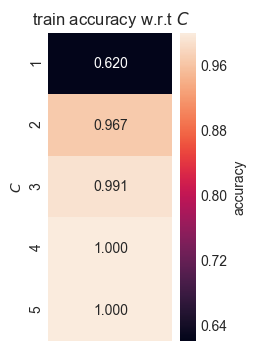

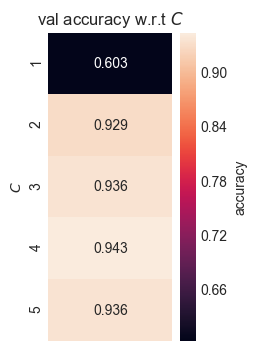

In [52]:
DT_clfGridSearch = decisionTreeTrainValidation(X2_train_val, Y2_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [53]:
#Use the best C to calculate the test accuracy.
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
DT_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.943262411348 from index 3.
Best D: 4
Test Accuracy Score: 0.916666666667


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.6469782   0.97162688  0.99211924  1.          1.        ]
[ 0.62411348  0.91489362  0.93617021  0.95035461  0.94326241]


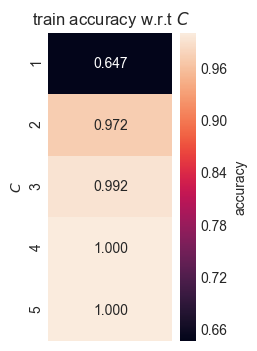

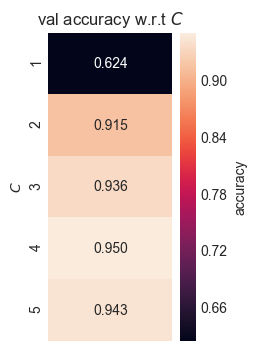

In [54]:
DT_clfGridSearch = decisionTreeTrainValidation(X3_train_val, Y3_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [55]:
#Use the best C to calculate the test accuracy.
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
DT_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.950354609929 from index 3.
Best D: 4
Test Accuracy Score: 0.861111111111


###### Mean of DT's Test Accuracies on (80% train, 20% test)

In [56]:
print('DT_accuracyTestList:' + str(DT_accuracyTestList_80_20))
DT_accuracyAverage_80_20 = statistics.mean(DT_accuracyTestList_80_20)
print('DT_accuracyTestList mean: ' + str(DT_accuracyAverage_80_20))

DT_accuracyTestList:[0.83333333333333337, 0.91666666666666663, 0.86111111111111116]
DT_accuracyTestList mean: 0.87037037037


### Decision Tree on (50% train, 50% test)
Splits the 3 shuffled datasets into 2 parts:
1. (50% of all the data points) ---> Training set + Validation Set.
2. (50% of all the data points) ---> Test set.

In [57]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.5)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.5)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.5)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.68828436  0.93567052  0.9987013   0.9987013   1.        ]
[ 0.64772727  0.88636364  0.92045455  0.93181818  0.92045455]


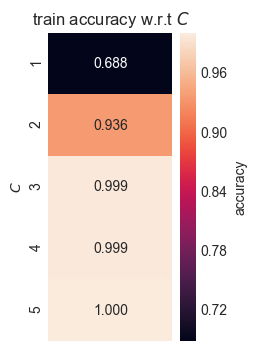

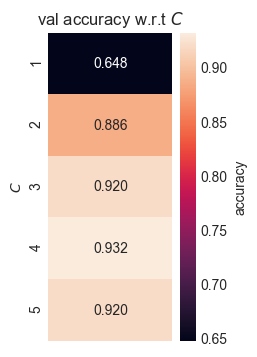

In [58]:
DT_clfGridSearch = decisionTreeTrainValidation(X1_train_val, Y1_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [59]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
DT_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.931818181818 from index 3.
Best D: 4
Test Accuracy Score: 0.910112359551


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.66152344  0.97478873  1.          1.          1.        ]
[ 0.60227273  0.90909091  0.94318182  0.92045455  0.92045455]


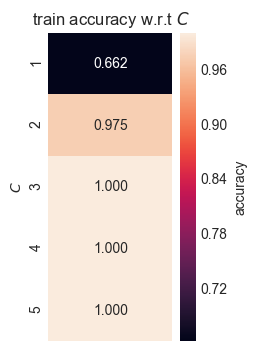

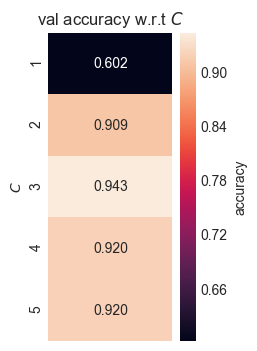

In [60]:
DT_clfGridSearch = decisionTreeTrainValidation(X2_train_val, Y2_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [61]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
DT_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.943181818182 from index 2.
Best D: 3
Test Accuracy Score: 0.898876404494


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.67051282  0.97853751  1.          1.          1.        ]
[ 0.64772727  0.95454545  0.96590909  0.94318182  0.94318182]


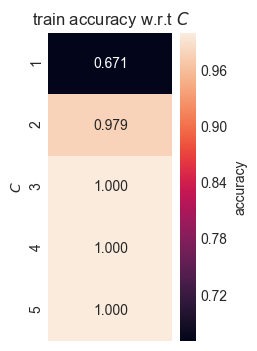

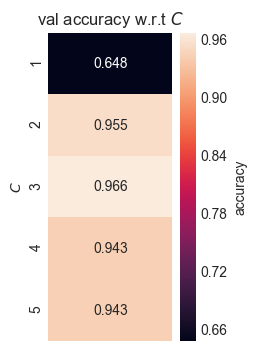

In [62]:
DT_clfGridSearch = decisionTreeTrainValidation(X3_train_val, Y3_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [63]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
DT_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.965909090909 from index 2.
Best D: 3
Test Accuracy Score: 0.932584269663


###### Mean of DT's Test Accuracies on (50% train, 50% test)

In [64]:
print('DT_accuracyTestList:' + str(DT_accuracyTestList_50_50))
DT_accuracyAverage_50_50 = statistics.mean(DT_accuracyTestList_50_50)
print('DT_accuracyTestList mean: ' + str(DT_accuracyAverage_50_50))

DT_accuracyTestList:[0.9101123595505618, 0.898876404494382, 0.93258426966292129]
DT_accuracyTestList mean: 0.913857677903


### Decision Tree on (20% train, 80% test)
Splits the 3 shuffled datasets into 2 parts:
1. (20% of all the data points) ---> Training set + Validation Set.
2. (80% of all the data points) ---> Test set.

In [65]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.2)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.2)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.2)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.73663425  0.97467979  1.          1.          1.        ]
[ 0.6         0.85714286  0.77142857  0.82857143  0.82857143]


/Users/rod/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


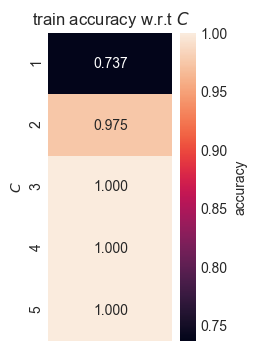

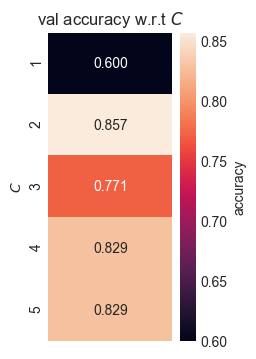

In [66]:
DT_clfGridSearch = decisionTreeTrainValidation(X1_train_val, Y1_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [67]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
DT_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.857142857143 from index 1.
Best D: 2
Test Accuracy Score: 0.838028169014


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.68870968  0.99677419  1.          1.          1.        ]
[ 0.54285714  0.85714286  0.85714286  0.85714286  0.85714286]


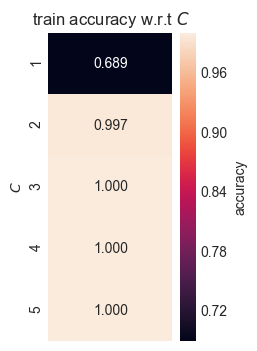

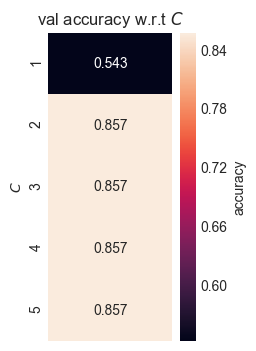

In [68]:
DT_clfGridSearch = decisionTreeTrainValidation(X2_train_val, Y2_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [69]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
DT_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.857142857143 from index 1.
Best D: 2
Test Accuracy Score: 0.87323943662


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.68572581  0.97469086  1.          1.          1.        ]
[ 0.6         0.85714286  0.88571429  0.85714286  0.82857143]


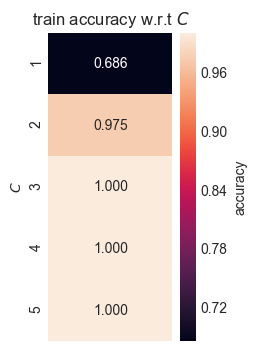

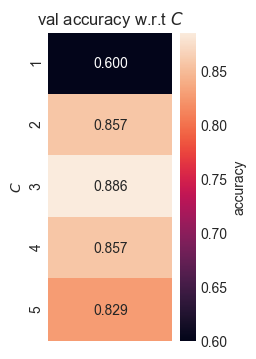

In [70]:
DT_clfGridSearch = decisionTreeTrainValidation(X3_train_val, Y3_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [71]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
DT_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.885714285714 from index 2.
Best D: 3
Test Accuracy Score: 0.781690140845


###### Mean of DT's Test Accuracies on (20% train, 80% test)

In [72]:
print('DT_accuracyTestList:' + str(DT_accuracyTestList_20_80))
DT_accuracyAverage_20_80 = statistics.mean(DT_accuracyTestList_20_80)
print('DT_accuracyTestList mean: ' + str(DT_accuracyAverage_20_80))

DT_accuracyTestList:[0.8380281690140845, 0.87323943661971826, 0.78169014084507038]
DT_accuracyTestList mean: 0.830985915493


### **<font color=green>Results of Decision Tree</font>**

In [73]:
print('DT_accuracyTestList (80% train, 20% test) partition mean: ' + str(DT_accuracyAverage_80_20))
print('DT_accuracyTestList (50% train, 50% test) partition mean: ' + str(DT_accuracyAverage_50_50))
print('DT_accuracyTestList (20% train, 80% test) partition mean: ' + str(DT_accuracyAverage_20_80))

DT_accuracyTestList (80% train, 20% test) partition mean: 0.87037037037
DT_accuracyTestList (50% train, 50% test) partition mean: 0.913857677903
DT_accuracyTestList (20% train, 80% test) partition mean: 0.830985915493


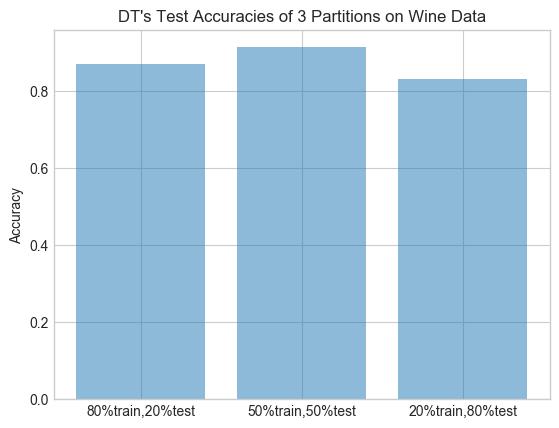

Accuracy of DT's 3 trials on (80% train, 20% test) partition :[0.83333333333333337, 0.91666666666666663, 0.86111111111111116]
Mean Accuracy of DT on (80% train, 20% test) partition: 0.87037037037

Accuracy of DT's 3 trials on (50% train, 50% test) partition :[0.9101123595505618, 0.898876404494382, 0.93258426966292129]
Mean Accuracy of DT on (50% train, 50% test) partition: 0.913857677903

Accuracy of DT's 3 trials on (20% train, 80% test) partition:[0.8380281690140845, 0.87323943661971826, 0.78169014084507038]
Mean Accuracy of DT on (20% train, 80% test) partition: 0.830985915493


In [74]:
displayAccuracies('DT', 'Wine Data', DT_accuracyAverage_80_20, DT_accuracyAverage_50_50, DT_accuracyAverage_20_80)
printAccuracies('DT', DT_accuracyTestList_80_20, DT_accuracyTestList_50_50, DT_accuracyTestList_20_80)

# Random Forest
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [75]:
#Global Variables For Random Forest
max_depth_List = [1,2,3,4,5]
RF_accuracyTestList_80_20 = []
RF_accuracyTestList_50_50 = []
RF_accuracyTestList_20_80 = []

In [76]:
from sklearn.ensemble import RandomForestClassifier

#max_depth_List: The chosen hyperparameter.
#cv: Number of folds when doing cross validation.
def randomForestTrainValidation(X_train_val, Y_train_val, max_depth_List, CV):
    
    #svm_classifier = svm.SVC(kernel = 'linear')
    RF_classifier = RandomForestClassifier()
  
    parameters = {'max_depth':max_depth_List}
    
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
    
    RF_clfGridSearch = GridSearchCV(RF_classifier, param_grid=parameters, cv=CV, return_train_score=True)
    RF_clfGridSearch.fit(X_train_val, Y_train_val)

    return RF_clfGridSearch

### Random Forest on (80% train, 20% test)
Splits the 3 shuffled datasets into 2 parts:
1. (80% of all the data points) ---> Training set + Validation Set.
2. (20% of all the data points) ---> Test set.

In [77]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.8)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.8)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.8)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.93223288  0.97870862  0.99213819  0.99605049  0.99921875]
[ 0.90070922  0.92198582  0.96453901  0.95744681  0.92907801]


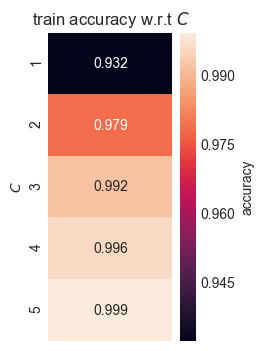

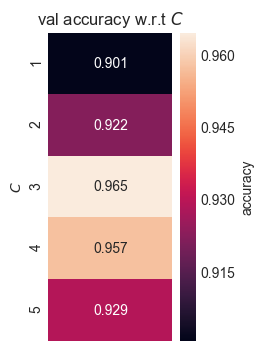

In [78]:
RF_clfGridSearch = randomForestTrainValidation(X1_train_val, Y1_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [79]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
RF_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.964539007092 from index 2.
Best max_depth: 3
Test Accuracy Score: 0.972222222222


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.9197862   0.98185158  0.99605655  0.99843135  0.9984251 ]
[ 0.90780142  0.96453901  0.95744681  0.93617021  0.9787234 ]


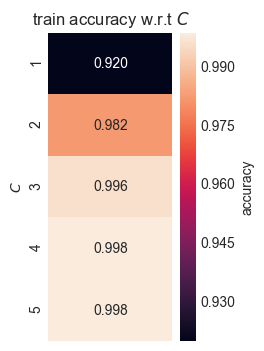

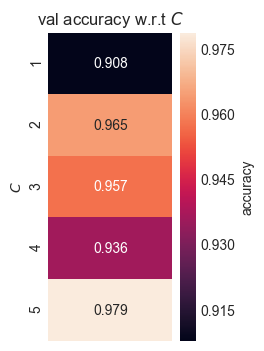

In [80]:
RF_clfGridSearch = randomForestTrainValidation(X2_train_val, Y2_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [81]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
RF_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.978723404255 from index 4.
Best max_depth: 5
Test Accuracy Score: 0.972222222222


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.95504652  0.97559533  0.99051309  0.99685645  0.99841895]
[ 0.92198582  0.95744681  0.96453901  0.97163121  0.95744681]


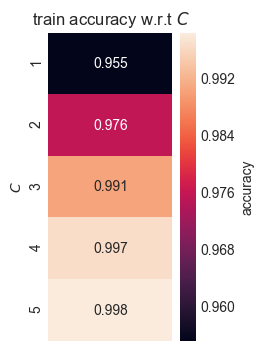

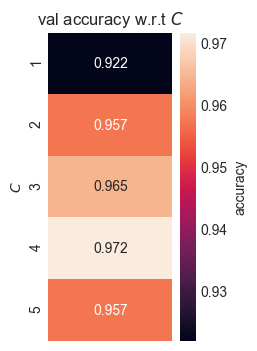

In [82]:
RF_clfGridSearch = randomForestTrainValidation(X3_train_val, Y3_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [83]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
RF_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.971631205674 from index 3.
Best max_depth: 4
Test Accuracy Score: 0.972222222222


###### Mean of RF's Test Accuracies on (80% train, 20% test)

In [84]:
print('RF_accuracyTestList:' + str(RF_accuracyTestList_80_20))
RF_accuracyAverage_80_20 = statistics.mean(RF_accuracyTestList_80_20)
print('RF_accuracyTestList mean: ' + str(RF_accuracyAverage_80_20))

RF_accuracyTestList:[0.97222222222222221, 0.97222222222222221, 0.97222222222222221]
RF_accuracyTestList mean: 0.972222222222


### Random Forest on (50% train, 50% test)
Splits the 3 shuffled datasets into 2 parts:
1. (50% of all the data points) ---> Training set + Validation Set.
2. (50% of all the data points) ---> Test set.

In [85]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.5)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.5)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.5)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.95083244  0.99240383  0.9962013   0.9975      0.99873418]
[ 0.94318182  0.94318182  0.97727273  0.94318182  0.96590909]


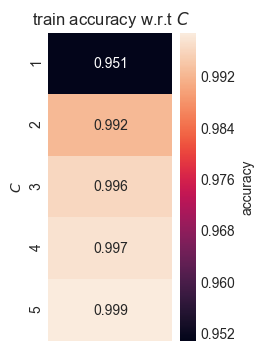

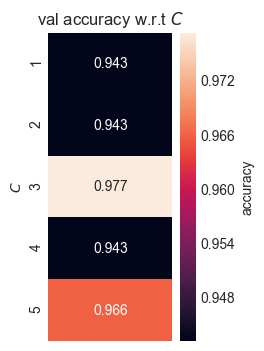

In [86]:
RF_clfGridSearch = randomForestTrainValidation(X1_train_val, Y1_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [87]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
RF_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.977272727273 from index 2.
Best max_depth: 3
Test Accuracy Score: 0.966292134831


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.94424189  0.97969454  0.99240386  0.99871795  0.99876543]
[ 0.90909091  0.95454545  0.92045455  0.95454545  0.97727273]


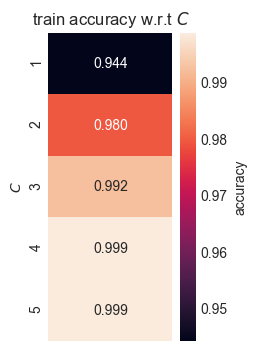

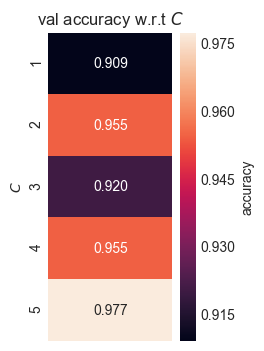

In [88]:
RF_clfGridSearch = randomForestTrainValidation(X2_train_val, Y2_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [89]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
RF_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.977272727273 from index 4.
Best max_depth: 5
Test Accuracy Score: 0.921348314607


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.85536562  0.97735043  0.99245014  1.          1.        ]
[ 0.80681818  0.94318182  0.96590909  0.96590909  0.97727273]


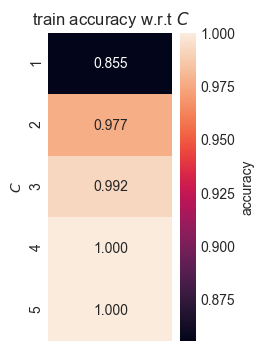

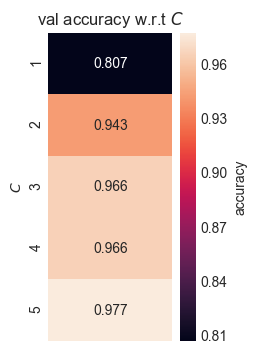

In [90]:
RF_clfGridSearch = randomForestTrainValidation(X3_train_val, Y3_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [91]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
RF_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.977272727273 from index 4.
Best max_depth: 5
Test Accuracy Score: 0.932584269663


###### Mean of RF's Test Accuracies on (50% train, 50% test)

In [92]:
print('RF_accuracyTestList:' + str(RF_accuracyTestList_50_50))
RF_accuracyAverage_50_50 = statistics.mean(RF_accuracyTestList_50_50)
print('RF_accuracyTestList mean: ' + str(RF_accuracyAverage_50_50))

RF_accuracyTestList:[0.9662921348314607, 0.9213483146067416, 0.93258426966292129]
RF_accuracyTestList mean: 0.940074906367


### Random Forest on (20% train, 80% test)
Splits the 3 shuffled datasets into 2 parts:
1. (20% of all the data points) ---> Training set + Validation Set.
2. (80% of all the data points) ---> Test set.

In [93]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.2)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.2)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.2)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

/Users/rod/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[ 0.92365394  1.          1.          0.99677419  1.        ]
[ 0.88571429  1.          0.91428571  0.97142857  0.97142857]


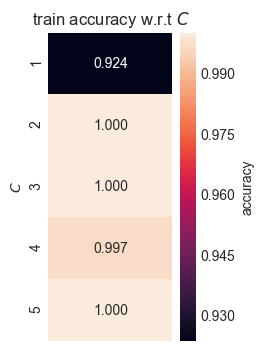

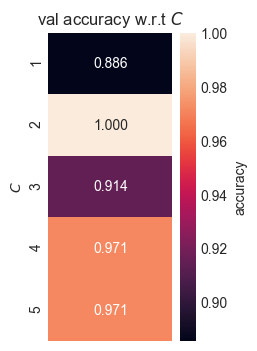

In [94]:
RF_clfGridSearch = randomForestTrainValidation(X1_train_val, Y1_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [95]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
RF_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 1.0 from index 1.
Best max_depth: 2
Test Accuracy Score: 0.908450704225


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.89909274  0.99042339  1.          1.          0.99364919]
[ 0.8         0.94285714  0.94285714  0.97142857  0.88571429]


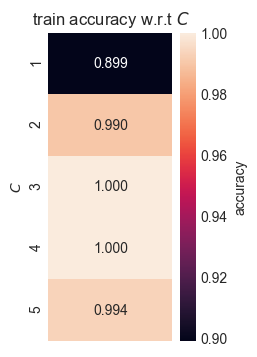

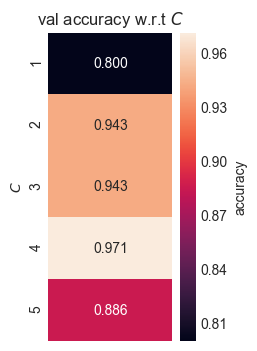

In [96]:
RF_clfGridSearch = randomForestTrainValidation(X2_train_val, Y2_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [97]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
RF_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.971428571429 from index 3.
Best max_depth: 4
Test Accuracy Score: 0.922535211268


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.94106183  0.99052419  0.996875    1.          0.996875  ]
[ 0.85714286  0.91428571  0.94285714  0.94285714  0.94285714]


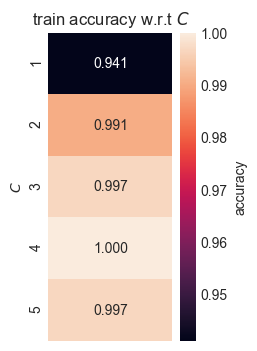

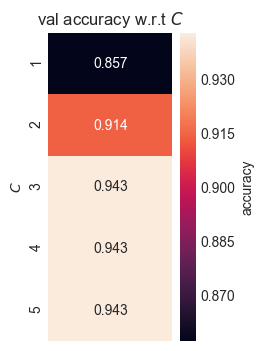

In [98]:
RF_clfGridSearch = randomForestTrainValidation(X3_train_val, Y3_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [99]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
RF_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.942857142857 from index 2.
Best max_depth: 3
Test Accuracy Score: 0.901408450704


###### Mean of RF's Test Accuracies on (20% train, 80% test)

In [100]:
print('RT_accuracyTestList:' + str(RF_accuracyTestList_20_80))
RF_accuracyAverage_20_80 = statistics.mean(RF_accuracyTestList_20_80)
print('RT_accuracyTestList mean: ' + str(RF_accuracyAverage_20_80))

RT_accuracyTestList:[0.90845070422535212, 0.92253521126760563, 0.90140845070422537]
RT_accuracyTestList mean: 0.910798122066


### **<font color=green>Results of Random Forest</font>**

In [101]:
print('RT_accuracyTestList (80% train, 20% test) partition mean: ' + str(RF_accuracyAverage_80_20))
print('RT_accuracyTestList (50% train, 50% test) partition mean: ' + str(RF_accuracyAverage_50_50))
print('RT_accuracyTestList (20% train, 80% test) partition mean: ' + str(RF_accuracyAverage_20_80))

RT_accuracyTestList (80% train, 20% test) partition mean: 0.972222222222
RT_accuracyTestList (50% train, 50% test) partition mean: 0.940074906367
RT_accuracyTestList (20% train, 80% test) partition mean: 0.910798122066


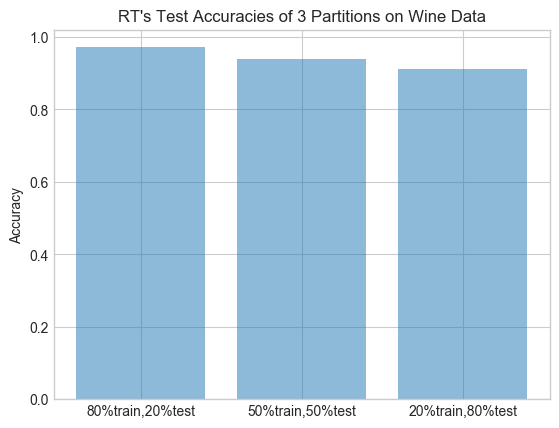

Accuracy of RT's 3 trials on (80% train, 20% test) partition :[0.97222222222222221, 0.97222222222222221, 0.97222222222222221]
Mean Accuracy of RT on (80% train, 20% test) partition: 0.972222222222

Accuracy of RT's 3 trials on (50% train, 50% test) partition :[0.9662921348314607, 0.9213483146067416, 0.93258426966292129]
Mean Accuracy of RT on (50% train, 50% test) partition: 0.940074906367

Accuracy of RT's 3 trials on (20% train, 80% test) partition:[0.90845070422535212, 0.92253521126760563, 0.90140845070422537]
Mean Accuracy of RT on (20% train, 80% test) partition: 0.910798122066


In [102]:
displayAccuracies('RT', 'Wine Data', RF_accuracyAverage_80_20, RF_accuracyAverage_50_50, RF_accuracyAverage_20_80)
printAccuracies('RT', RF_accuracyTestList_80_20, RF_accuracyTestList_50_50, RF_accuracyTestList_20_80)

# Results

In [103]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                #'%d' % int(height),
                '%d' % int(height) + '%',
                ha='center', va='bottom')

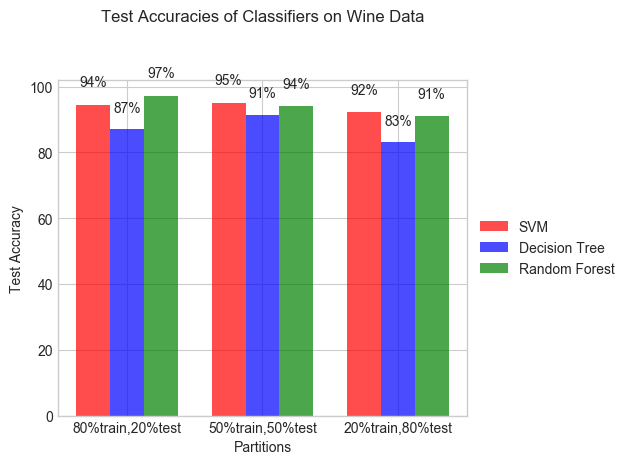

In [104]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 3
SVM_partitions = (SVM_accuracyAverage_80_20*100, SVM_accuracyAverage_50_50*100, SVM_accuracyAverage_20_80*100)
DT_partitions = (DT_accuracyAverage_80_20*100, DT_accuracyAverage_50_50*100, DT_accuracyAverage_20_80*100)
RT_partitions = (RF_accuracyAverage_80_20*100, RF_accuracyAverage_50_50*100, RF_accuracyAverage_20_80*100)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = .25
opacity = .7
 
SVM = plt.bar(index, SVM_partitions, bar_width,#align='center',
                 alpha=opacity,
                 color='r',
                 label='SVM')
 
DT = plt.bar(index + bar_width, DT_partitions, bar_width,#align='center',
                 alpha=opacity,
                 color='b',
                 label='Decision Tree')

RT = plt.bar(index + bar_width + bar_width, RT_partitions, bar_width,#align='center',
                 alpha=opacity,
                 color='g',
                 label='Random Forest')
 
plt.xlabel('Partitions')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracies of Classifiers on Wine Data', y=1.15)
plt.xticks(index + bar_width, ('80%train,20%test', '50%train,50%test', '20%train,80%test'))
#plt.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

autolabel(SVM)
autolabel(DT)
autolabel(RT)

plt.tight_layout()
plt.grid()
plt.show()